In [1]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoode.algorithms import GDE3, NSDE
from pymoode.survival import RankAndCrowding
from pymoode.performance import SpacingIndicator

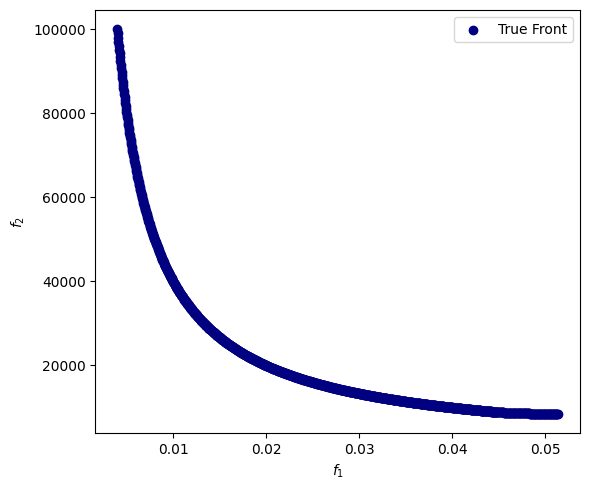

In [2]:
problem = get_problem("truss2d")
pf = problem.pareto_front()

fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [3]:
problem.__dict__

{'n_var': 3,
 'n_obj': 2,
 'n_ieq_constr': 1,
 'n_eq_constr': 0,
 'data': {},
 'xl': array([0., 0., 1.]),
 'xu': array([0.01, 0.01, 3.  ]),
 'callback': None,
 'vars': None,
 'vtype': float,
 'elementwise': False,
 'elementwise_func': pymoo.core.problem.ElementwiseEvaluationFunction,
 'elementwise_runner': <pymoo.core.problem.LoopedElementwiseEvaluation at 0x1e54acbadf0>,
 'strict': True,
 'replace_nan_values_by': None,
 'exclude_from_serialization': None,
 'Amax': 0.01,
 'Smax': 100000.0,
 'cache': {'pareto_front': array([[4.00000000e-03, 1.00000000e+05],
         [4.04076212e-03, 9.89912269e+04],
         [4.08152424e-03, 9.80026030e+04],
         ...,
         [5.12523523e-02, 8.43734735e+03],
         [5.13196822e-02, 8.43503207e+03],
         [5.13870120e-02, 8.43274043e+03]])}}

In [4]:
NGEN = 250
POPSIZE = 100
SEED = 5

In [5]:
%%time

gde3 = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), repair="bounce-back",
            survival=RankAndCrowding(crowding_func="cd"))

res_gde3 = minimize(problem,
                    gde3,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      igd      |       gd      |       hv     
     1 |      100 |     17 |  0.000000E+00 |  3.071072E+04 |  0.0450115971 |  0.0371151806 |  0.7826319412
     2 |      200 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0382336732 |  0.0362601731 |  0.7863832174
     3 |      300 |     28 |  0.000000E+00 |  0.000000E+00 |  0.0315675515 |  0.0183351604 |  0.8001620594
     4 |      400 |     35 |  0.000000E+00 |  0.000000E+00 |  0.0265376353 |  0.0183526303 |  0.8075593066
     5 |      500 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0248779255 |  0.0154714781 |  0.8138355594
     6 |      600 |     42 |  0.000000E+00 |  0.000000E+00 |  0.0221593093 |  0.0164404657 |  0.8172307705
     7 |      700 |     52 |  0.000000E+00 |  0.000000E+00 |  0.0190351679 |  0.0159676502 |  0.8218218660
     8 |      800 |     55 |  0.000000E+00 |  0.000000E+00 |  0.0159508853 |  0.0146817816 |  0.8243603814
     9 |      900 |     62 |  0.00000

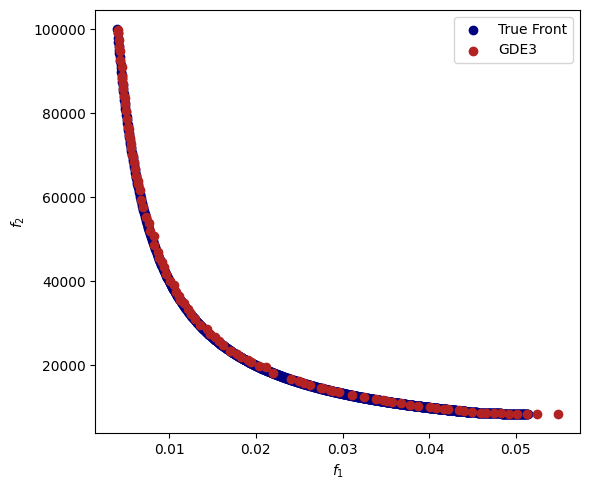

In [6]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [7]:
#This is the pure python implementation of pcd to compare runtime to cython
from pymoode.misc.pruning_cd import calc_pcd

def calc_pcd_nds(F, n_remove: int=0):
    return calc_pcd(F, n_remove=n_remove)

In [8]:
%%time

gde3p = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), repair="bounce-back",
             survival=RankAndCrowding(crowding_func=calc_pcd_nds))

res_gde3p = minimize(problem,
                     gde3p,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      igd      |       gd      |       hv     
     1 |      100 |     17 |  0.000000E+00 |  3.071072E+04 |  0.0450115971 |  0.0371151806 |  0.7826319412
     2 |      200 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0382336732 |  0.0362601731 |  0.7863832174
     3 |      300 |     28 |  0.000000E+00 |  0.000000E+00 |  0.0315675515 |  0.0183351604 |  0.8001620594
     4 |      400 |     33 |  0.000000E+00 |  0.000000E+00 |  0.0281230609 |  0.0192898467 |  0.8081176293
     5 |      500 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0198004478 |  0.0152116503 |  0.8167547236
     6 |      600 |     55 |  0.000000E+00 |  0.000000E+00 |  0.0171714043 |  0.0143423158 |  0.8237157648
     7 |      700 |     66 |  0.000000E+00 |  0.000000E+00 |  0.0151453913 |  0.0127312555 |  0.8287360147
     8 |      800 |     81 |  0.000000E+00 |  0.000000E+00 |  0.0130501910 |  0.0115131660 |  0.8314569923
     9 |      900 |     87 |  0.00000

250 |   25000 |  0.00000E+00 |  0.00000E+00 |  0.004744463 |  0.001706305 |  0.851513724

In [9]:
%%time

gde3p = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), repair="bounce-back",
             survival=RankAndCrowding(crowding_func="pcd"))

res_gde3p = minimize(problem,
                     gde3p,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      igd      |       gd      |       hv     
     1 |      100 |     17 |  0.000000E+00 |  3.071072E+04 |  0.0450115971 |  0.0371151806 |  0.7826319412
     2 |      200 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0382336732 |  0.0362601731 |  0.7863832174
     3 |      300 |     28 |  0.000000E+00 |  0.000000E+00 |  0.0315675515 |  0.0183351604 |  0.8001620594
     4 |      400 |     33 |  0.000000E+00 |  0.000000E+00 |  0.0281230609 |  0.0192898467 |  0.8081176293
     5 |      500 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0198004478 |  0.0152116503 |  0.8167547236
     6 |      600 |     55 |  0.000000E+00 |  0.000000E+00 |  0.0171714043 |  0.0143423158 |  0.8237157648
     7 |      700 |     66 |  0.000000E+00 |  0.000000E+00 |  0.0151453913 |  0.0127312555 |  0.8287360147
     8 |      800 |     81 |  0.000000E+00 |  0.000000E+00 |  0.0130501910 |  0.0115131660 |  0.8314569923
     9 |      900 |     87 |  0.00000

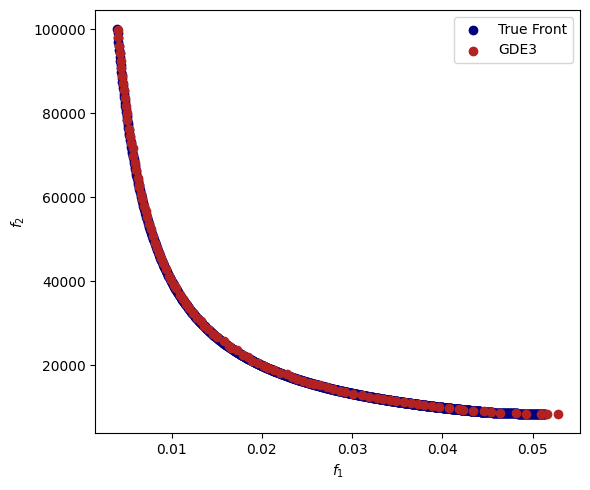

In [10]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3p.F[:, 0], res_gde3p.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [11]:
sp = SpacingIndicator(
    zero_to_one=True,
    ideal=problem.pareto_front().min(axis=0),
    nadir=problem.pareto_front().max(axis=0)
)

The lesser the spacing, the more even the distribution of elements

In [12]:
print("Spacing of normal crowding distances: ", sp.do(res_gde3.F))
print("Spacing of pruning crowding distances: ", sp.do(res_gde3p.F))

Spacing of normal crowding distances:  0.007531202373576977
Spacing of pruning crowding distances:  0.0032956432593306034


In [13]:
%%time

nsga2 = NSGA2(pop_size=POPSIZE, survival=RankAndCrowding(crowding_func="pcd"))

res_nsga2 = minimize(problem,
                     nsga2,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      igd      |       gd      |       hv     
     1 |      100 |     13 |  0.000000E+00 |  4.803288E+04 |  0.0490279574 |  0.0305836479 |  0.7673175979
     2 |      200 |     17 |  0.000000E+00 |  0.000000E+00 |  0.0410400559 |  0.0241141188 |  0.7788885073
     3 |      300 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0256406334 |  0.0228062175 |  0.8115225472
     4 |      400 |     49 |  0.000000E+00 |  0.000000E+00 |  0.0188245543 |  0.0213284037 |  0.8185545212
     5 |      500 |     54 |  0.000000E+00 |  0.000000E+00 |  0.0172043060 |  0.0247204419 |  0.8248338236
     6 |      600 |     68 |  0.000000E+00 |  0.000000E+00 |  0.0144974459 |  0.0241794643 |  0.8320515319
     7 |      700 |     81 |  0.000000E+00 |  0.000000E+00 |  0.0128154106 |  0.0164472743 |  0.8344335610
     8 |      800 |     99 |  0.000000E+00 |  0.000000E+00 |  0.0117758492 |  0.0221412375 |  0.8358202140
     9 |      900 |    100 |  0.00000

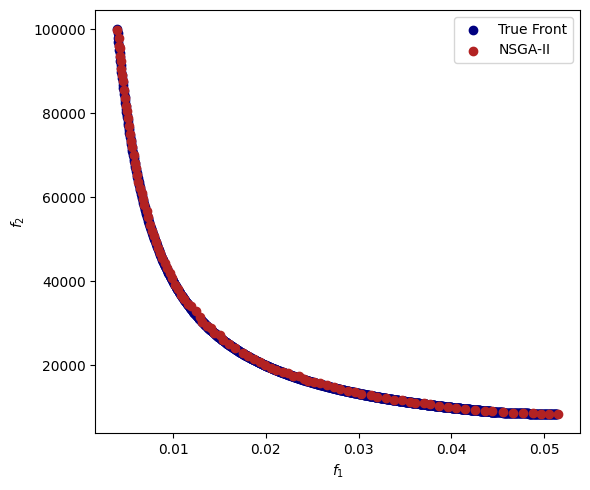

In [14]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsga2.F[:, 0], res_nsga2.F[:, 1], color="firebrick", label="NSGA-II")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [15]:
%%time
nsde = NSDE(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), repair="bounce-back",
            survival=RankAndCrowding(crowding_func="pcd"))
    
res_nsde = minimize(problem,
                    nsde,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      igd      |       gd      |       hv     
     1 |      100 |     17 |  0.000000E+00 |  3.071072E+04 |  0.0450115971 |  0.0371151806 |  0.7826319412
     2 |      200 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0382336732 |  0.0362601731 |  0.7863832174
     3 |      300 |     33 |  0.000000E+00 |  0.000000E+00 |  0.0299608610 |  0.0353796807 |  0.8061270589
     4 |      400 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0237188913 |  0.0162808407 |  0.8151640948
     5 |      500 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0173451201 |  0.0128188002 |  0.8258874282
     6 |      600 |     55 |  0.000000E+00 |  0.000000E+00 |  0.0158208635 |  0.0118481551 |  0.8309163118
     7 |      700 |     61 |  0.000000E+00 |  0.000000E+00 |  0.0145383912 |  0.0129005036 |  0.8343670747
     8 |      800 |     62 |  0.000000E+00 |  0.000000E+00 |  0.0127663924 |  0.0107222758 |  0.8365885954
     9 |      900 |     74 |  0.00000

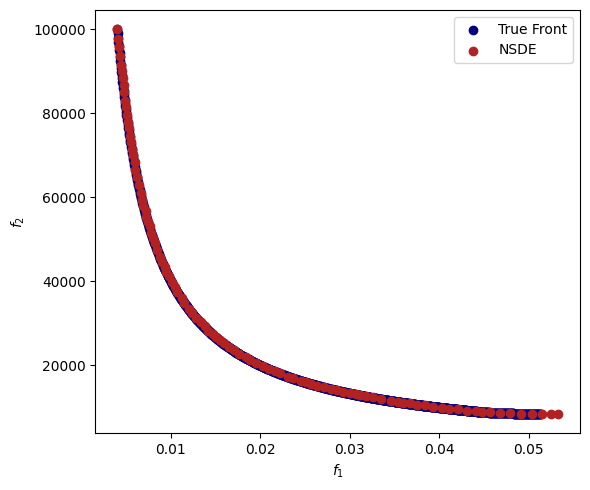

In [16]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsde.F[:, 0], res_nsde.F[:, 1], color="firebrick", label="NSDE")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()